In [12]:
%matplotlib inline
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.ndimage.filters import gaussian_filter

from app.models import ExperimentResult

In [2]:
def f(x):
    return (97.78*(x)+0.910)/10000

def inst_to_df(inst):
    i = json.loads(inst.i)
    v = json.loads(inst.v)
    df = pd.DataFrame.from_dict({'i': i, 'v': v})\
            .sort_values(by=['v'])
        
    X = df.v.values.reshape([df.v.shape[0], 1])
    Y = df.i
    n = 1000
    model = make_pipeline(\
                PolynomialFeatures(5), 
                RandomForestRegressor(n_estimators=100, min_samples_split=100)\
            ).fit(X, Y)
    X_ = np.linspace(df.v.min(), df.v.max(), n)
    mdf = pd.DataFrame.from_dict({'v':X_, 'i':model.predict(X_.reshape(-1, 1))})
    # mdf = pd.DataFrame.from_dict({'v':X, 'i':Y.reshape([df.v.shape[0], 1])})
    mdf.i = gaussian_filter(mdf.i, sigma=20)
    mdf = mdf.round(2)

    mdf.v = (mdf.v/4095)*5.0 
    mdf.i = ((mdf.i/4095)*5.0)/(0.033)
    mdf.v = round(mdf.v,2)
    return mdf 

def peak(df):
    return df[df.v==0.47].i.max()

def _find_peak(pk):
    try:
        inst = ExperimentResult.objects.get(pk=pk)
        return peak(inst_to_df(inst))
    except Exception as err:
        return None

In [3]:
exp_result = pd.read_csv('experiment_result.csv')
df = exp_result.copy()
df['peak'] = df.exp.apply(_find_peak)

In [4]:
df

,exp,aa,ua,cell,lopp,peak
0,1459,0.1,0.50,170,5,24.911755
1,1460,0.1,0.50,170,5,28.366448
2,1461,0.1,0.50,170,5,28.111518
3,1462,0.1,0.50,150,5,48.756799
4,1463,0.1,0.50,150,5,49.712880
5,1464,0.1,0.50,150,5,50.755541
6,1465,0.1,0.50,130,5,38.272468
7,1466,0.1,0.50,130,5,40.755541
8,1467,0.1,0.50,130,5,41.846302
9,1468,0.1,0.50,130,5,44.457764


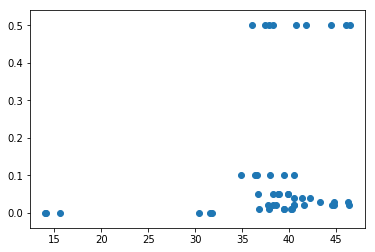

In [34]:
mdf = df[df.cell==130]
plt.scatter(mdf.peak, mdf.ua)

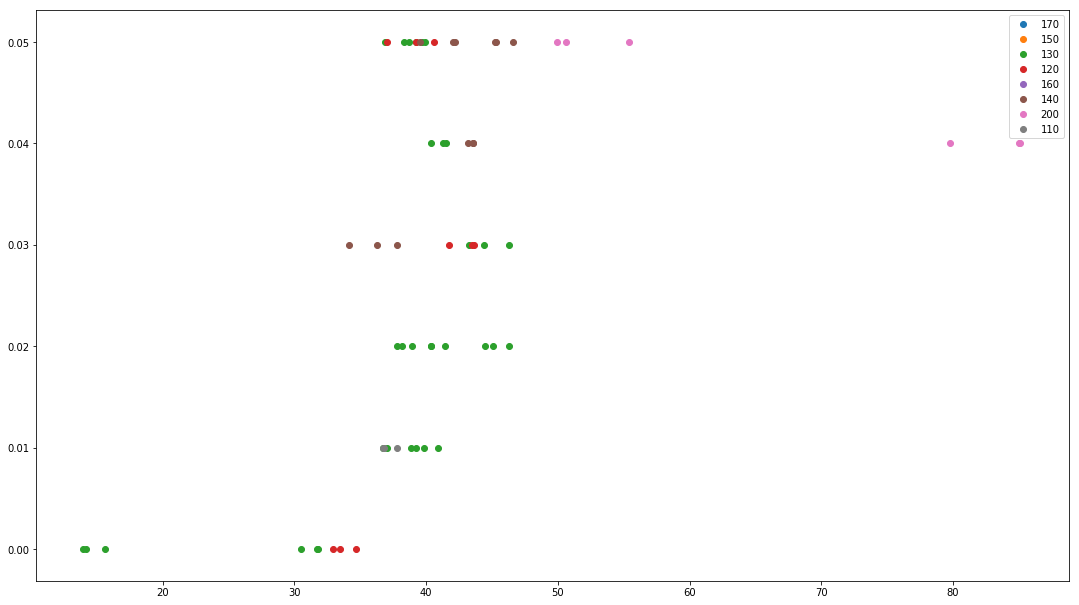

In [11]:
lst = range(1459, 1552)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for group in df.cell.unique():# [130]:
#     if not df.exp in lst: continue
    _mdf = df[df.cell==group]
    _mdf = _mdf[(_mdf.exp.isin(lst))]
#     _mdf = _mdf[(_mdf.ua<=0.1)]
    _mdf = _mdf[(_mdf.ua<0.1)]
    ax.scatter(_mdf.peak, _mdf.ua, label=group)
ax.legend()
plt.show()

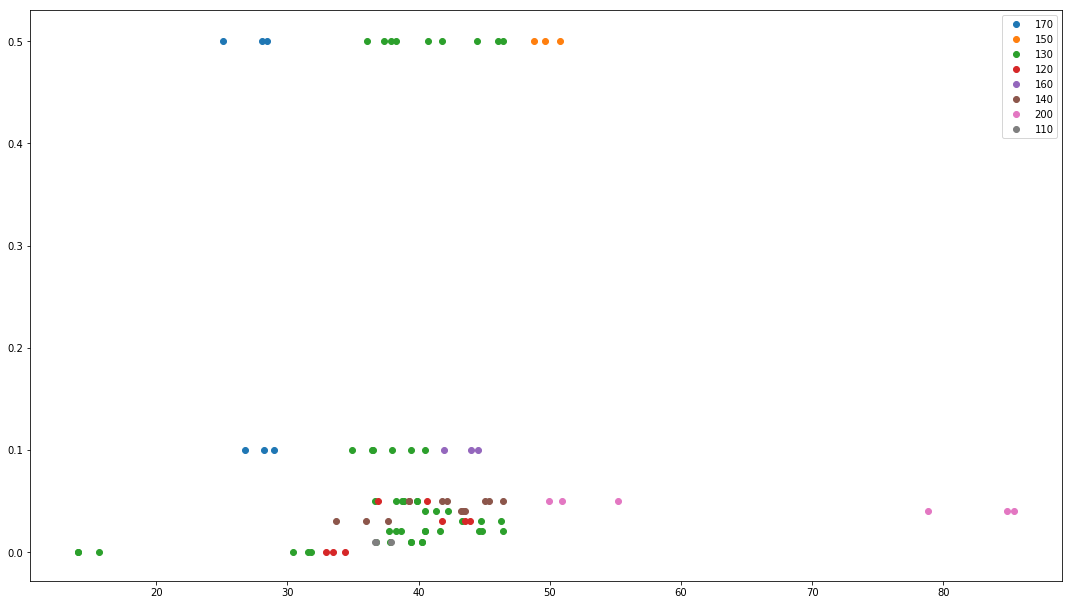

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for group in df.cell.unique():
#     if group != 130: continue
    _mdf = df[df.cell==group]
    ax.scatter(_mdf.peak, _mdf.ua, label=group)
ax.legend()
plt.show()

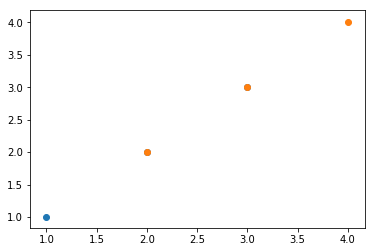

In [45]:
x = [[1,2,3], [2,3,4]]
y = [[1,2,3], [2,3,4]]
plt.scatter(x[0], y[0])
plt.scatter(x[1], y[1])
plt.legend()
plt.show()

In [19]:
lst = list(range(1459, 1552))
for i, pk in enumerate(lst, start=1):
    try:
        df = inst_to_df(ExperimentResult.objects.get(pk=pk))
        p = peak(df)
        result = f(p)
        print('{} {} {}'.format(pk, result, p))
    except ValueError as err:
        print('{} {}'.format(pk, err))
    if i%3==0 and i != 0:
        print() 

1459 0.24515061001961003 25.062345062345063
1460 0.27750516435416434 28.37125837125837
1461 0.2756492003182003 28.18144818144818

1462 0.47627420938320936 48.6994486994487
1463 0.48632463451363445 49.72730972730972
1464 0.4953692935582935 50.65231065231065

1465 0.3735702969992969 38.19587819587819
1466 0.39921733218633215 40.81881081881082
1467 0.4098104368594368 41.902171902171894

1468 0.4344915024605024 44.42631442631442
1469 0.45576454053354043 46.6019166019166
1470 0.45153164010064 46.16901616901616

1471 0.35272054896954896 36.063566063566064
1472 0.36666017748917745 37.489177489177486
1473 0.37046255215155216 37.87804787804788

1474 arrays must all be same length
1475 arrays must all be same length
1476 arrays must all be same length

1477 0.3413242785732786 34.8980648980649
1478 0.3577493793983793 36.57786657786657
1479 0.3690154067044067 37.73004773004773

1480 0.26081595948495945 26.66444666444666
1481 0.277194028083028 28.339438339438335
1482 0.2828125702815703 28.914048914

In [26]:
mdf = df[df.ua<0.1]
mdf = mdf.dropna()

In [27]:
mdf

,exp,aa,ua,cell,lopp,peak
30,1489,0.1,0.05,120,5,37.028527
31,1490,0.1,0.05,120,5,39.245199
32,1491,0.1,0.05,120,5,40.616051
33,1492,0.1,0.05,140,5,39.502720
34,1493,0.1,0.05,140,5,42.195582
35,1494,0.1,0.05,140,5,42.075702
36,1495,0.1,0.05,140,5,45.342065
37,1496,0.1,0.05,140,5,45.247715
38,1497,0.1,0.05,140,5,46.600067
39,1498,0.1,0.05,130,5,36.843897


In [28]:
X = mdf[['cell', 'peak']]
Y = mdf.ua

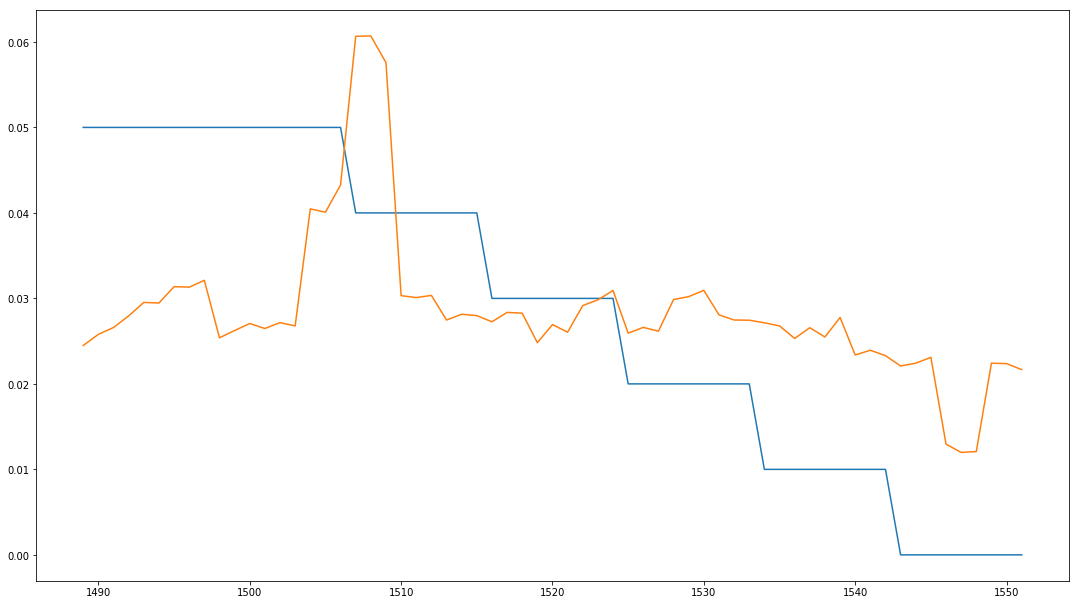

In [56]:
model = LinearRegression().fit(X, Y)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(mdf.exp, mdf.ua)
ax.plot(mdf.exp, model.predict(X))
plt.show()

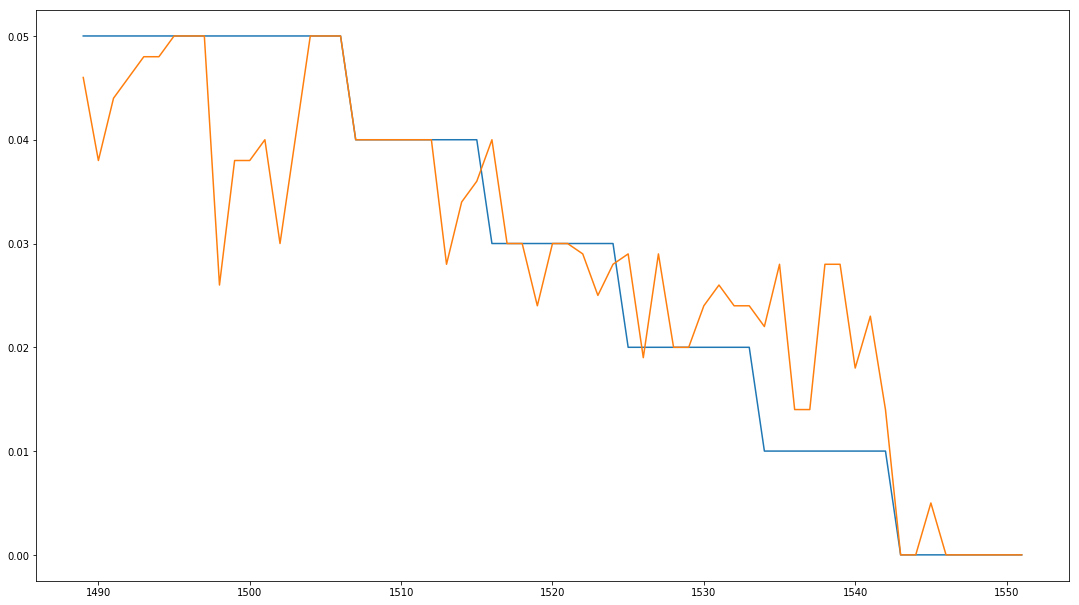

In [69]:
model = RandomForestRegressor().fit(X, Y)
model.score(X, Y)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(mdf.exp, mdf.ua)
ax.plot(mdf.exp, model.predict(X))
plt.show()

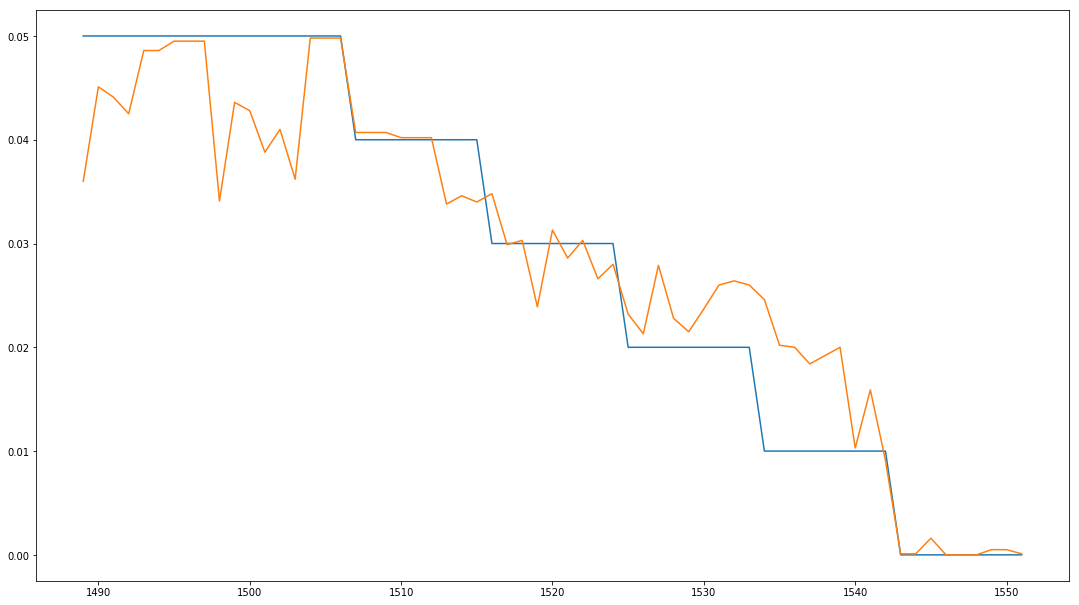

In [77]:
model = make_pipeline(\
            PolynomialFeatures(5), 
            RandomForestRegressor(n_estimators=100,)\
        ).fit(X, Y)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(mdf.exp, mdf.ua)
ax.plot(mdf.exp, model.predict(X))
plt.show()